In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [11]:
X = np.array([1, 3], dtype=float)
Y = np.array([3, 6], dtype=float)
N = len(X)

m = -1.0
b =  1.0
alpha = 0.1

num_iterations = 4


In [6]:
def predict(m, b, X):
    """Step 1 — Compute predicted values:  y_hat = mx + b"""
    return m * X + b


def compute_errors(Y, Y_hat):
    """Step 2 — Compute errors:  e = y - y_hat"""
    return Y - Y_hat


def compute_mse(errors, N):
    """Step 3 — Mean Squared Error:  J = (1/N) * sum(e^2)"""
    return (1 / N) * np.sum(errors ** 2)


def compute_gradients(X, errors, N):
    """
    Step 4 — Partial derivatives via Chain Rule:
      dJ/dm = (-2/N) * sum(x * e)
      dJ/db = (-2/N) * sum(e)
    """
    dJ_dm = (-2 / N) * np.sum(X * errors)
    dJ_db = (-2 / N) * np.sum(errors)
    return dJ_dm, dJ_db


def update_parameters(m, b, dJ_dm, dJ_db, alpha):
    """
    Step 5 — Gradient Descent update rules:
      m_new = m - alpha * dJ/dm
      b_new = b - alpha * dJ/db
    """
    m_new = m - alpha * dJ_dm
    b_new = b - alpha * dJ_db
    return m_new, b_new

In [7]:

history_m     = [m]
history_b     = [b]
history_error = [(1 / N) * np.sum(compute_errors(Y, predict(m, b, X)) ** 2)]

print("=" * 70)
print("   GRADIENT DESCENT — 4 ITERATIONS (matching Part 3 manual)")
print("=" * 70)
print(f"\n  Initial  -->  m = {m},  b = {b},  MSE = {history_error[0]}\n")
print(f"{'Iter':>5} | {'m':>8} | {'b':>8} | {'dJ/dm':>8} | {'dJ/db':>8} | {'MSE':>10}")
print("-" * 70)

for i in range(1, num_iterations + 1):


    Y_hat = predict(m, b, X)


    errors = compute_errors(Y, Y_hat)


    mse = compute_mse(errors, N)


    dJ_dm, dJ_db = compute_gradients(X, errors, N)


    m, b = update_parameters(m, b, dJ_dm, dJ_db, alpha)


    history_m.append(m)
    history_b.append(b)
    history_error.append(compute_mse(compute_errors(Y, predict(m, b, X)), N))


    print(f"  {i:>4} | {m:>8.4f} | {b:>8.4f} | {dJ_dm:>8.4f} | {dJ_db:>8.4f} | {mse:>10.6f}")
    print(f"         -> m: {history_m[i-1]:.4f} --> {m:.4f}   |   b: {history_b[i-1]:.4f} --> {b:.4f}")

print("-" * 70)


   GRADIENT DESCENT — 4 ITERATIONS (matching Part 3 manual)

  Initial  -->  m = -1.0,  b = 1.0,  MSE = 36.5

 Iter |        m |        b |    dJ/dm |    dJ/db |        MSE
----------------------------------------------------------------------
     1 |   1.7000 |   2.1000 | -27.0000 | -11.0000 |  36.500000
         -> m: -1.0000 --> 1.7000   |   b: 1.0000 --> 2.1000
     2 |   1.2600 |   1.9000 |   4.4000 |   2.0000 |   1.040000
         -> m: 1.7000 --> 1.2600   |   b: 2.1000 --> 1.9000
     3 |   1.3400 |   1.9160 |  -0.8000 |  -0.1600 |   0.064000
         -> m: 1.2600 --> 1.3400   |   b: 1.9000 --> 1.9160
     4 |   1.3336 |   1.8968 |   0.0640 |   0.1920 |   0.034816
         -> m: 1.3400 --> 1.3336   |   b: 1.9160 --> 1.8968
----------------------------------------------------------------------


In [8]:
def cost_for_m(slope):
    """Cost as a function of slope only (b held at final value)."""
    e = compute_errors(Y, predict(slope, b, X))
    return compute_mse(e, N)

result = minimize_scalar(cost_for_m, bounds=(-5, 5), method='bounded')

print(f"\n  [SciPy Check] Best m (b fixed={b:.4f}): {result.x:.4f}")
print(f"  [Our GD]     Final m after 4 iters:    {m:.4f}  -- converging correctly\n")



  [SciPy Check] Best m (b fixed=1.8968): 1.3413
  [Our GD]     Final m after 4 iters:    1.3336  -- converging correctly



In [9]:
print("=" * 70)
print("  FINAL PREDICTIONS  (using m = {:.4f}, b = {:.4f})".format(m, b))
print("=" * 70)

Y_final = predict(m, b, X)
for xi, yi, yi_hat in zip(X, Y, Y_final):
    print(f"  x = {xi:.0f}  -->  y_true = {yi:.1f},   y_pred = {yi_hat:.4f},   error = {abs(yi - yi_hat):.4f}")

print()



  FINAL PREDICTIONS  (using m = 1.3336, b = 1.8968)
  x = 1  -->  y_true = 3.0,   y_pred = 3.2304,   error = 0.2304
  x = 3  -->  y_true = 6.0,   y_pred = 5.8976,   error = 0.1024



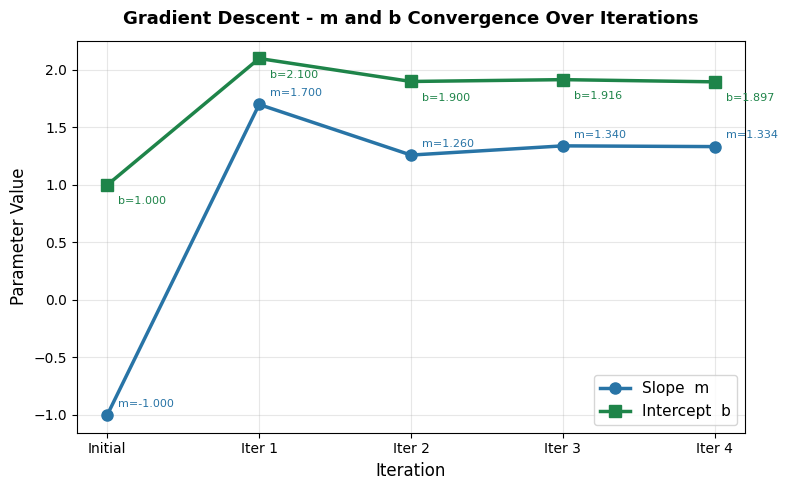

  Plot 1 saved: plot1_parameters.png


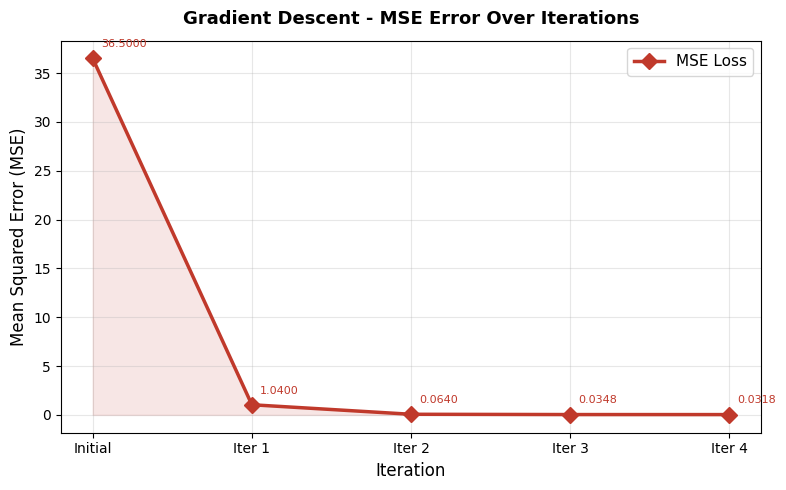

  Plot 2 saved: plot2_error.png


In [10]:
iters = list(range(num_iterations + 1))


fig1, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(iters, history_m, color="#2874A6", linewidth=2.5,
         marker='o', markersize=8, label="Slope  m")
ax1.plot(iters, history_b, color="#1E8449", linewidth=2.5,
         marker='s', markersize=8, label="Intercept  b")


for i, (mv, bv) in enumerate(zip(history_m, history_b)):
    ax1.annotate(f"m={mv:.3f}", (i, mv), textcoords="offset points",
                 xytext=(8, 6), fontsize=8, color="#2874A6")
    ax1.annotate(f"b={bv:.3f}", (i, bv), textcoords="offset points",
                 xytext=(8, -14), fontsize=8, color="#1E8449")

ax1.set_title("Gradient Descent - m and b Convergence Over Iterations",
              fontsize=13, fontweight='bold', pad=12)
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Parameter Value", fontsize=12)
ax1.set_xticks(iters)
ax1.set_xticklabels([f"Iter {i}" if i > 0 else "Initial" for i in iters])
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plot1_parameters.png", dpi=150)
plt.show()
print("  Plot 1 saved: plot1_parameters.png")



fig2, ax2 = plt.subplots(figsize=(8, 5))

ax2.plot(iters, history_error, color="#C0392B", linewidth=2.5,
         marker='D', markersize=8, label="MSE Loss")
ax2.fill_between(iters, history_error, alpha=0.12, color="#C0392B")


for i, ev in enumerate(history_error):
    ax2.annotate(f"{ev:.4f}", (i, ev), textcoords="offset points",
                 xytext=(6, 8), fontsize=8, color="#C0392B")

ax2.set_title("Gradient Descent - MSE Error Over Iterations",
              fontsize=13, fontweight='bold', pad=12)
ax2.set_xlabel("Iteration", fontsize=12)
ax2.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax2.set_xticks(iters)
ax2.set_xticklabels([f"Iter {i}" if i > 0 else "Initial" for i in iters])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plot2_error.png", dpi=150)
plt.show()
print("  Plot 2 saved: plot2_error.png")


